<div style="background:#F2EFE7; padding:20px; border-radius:10px">

<h1 style="color:#006A71;"> Hotel Booking Demand Analysis</h1>

<p style="color:#006A71; font-size:16px">
Welcome to the Hotel Booking Demand Prediction project! In this notebook, we analyze hotel reservation data to understand:
</p>

<ul style="color:#006A71; font-size:16px">
  <li>Booking behaviors of guests</li>
  <li>Cancellation patterns</li>
  <li>Impact of customer type, lead time, and arrival details</li>
</ul>

<p style="color:#006A71; font-size:16px">
The insights generated will be useful for revenue optimization, better guest engagement, and improving operational efficiency.
</p>

</div>


<div style="background:#9ACBD0; padding:20px; border-radius:10px">

<h2 style="color:#006A71;"> ▪ Problem Statement & Objectives</h2>

<p style="color:#006A71; font-size:16px">
The hospitality industry faces challenges in forecasting demand and minimizing cancellations. This notebook focuses on analyzing historical booking data to:
</p>

<ol style="color:#006A71; font-size:16px">
  <li>Identify key factors that influence booking cancellations</li>
  <li>Understand seasonal and customer-based trends</li>
  <li>Develop predictive insights to aid hotel planning and marketing strategies</li>
</ol>

<p style="color:#006A71; font-size:16px">
The ultimate goal is to transform raw booking data into actionable intelligence for decision-makers in the hotel industry.
</p>

</div>


In [9]:
!pip install numpy pandas matplotlib seaborn
print("All libraries installled succesfully")

All libraries installled succesfully



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="background:#F2EFE7; padding:15px; border-radius:8px">

<h3 style="color:#006A71;">▪ Import Libraries & Load Data</h3>

<p style="color:#006A71; font-size:15px">
We begin by importing necessary Python libraries for data analysis and visualization, followed by loading the hotel booking dataset into a DataFrame.
</p>

</div>


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

<div style="background:#9ACBD0; padding:15px; border-radius:8px">

<h3 style="color:#006A71;">▪ Initial Data Exploration</h3>

<p style="color:#006A71; font-size:15px">
We examine the first few rows of the dataset, <br> check for null values,<br> data types, and basic statistical summaries.<br> We also visualize the distribution of the target variable <code>is_canceled</code>.
</p>

</div>


In [4]:
df = pd.read_csv("hotel_bookings.csv")

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

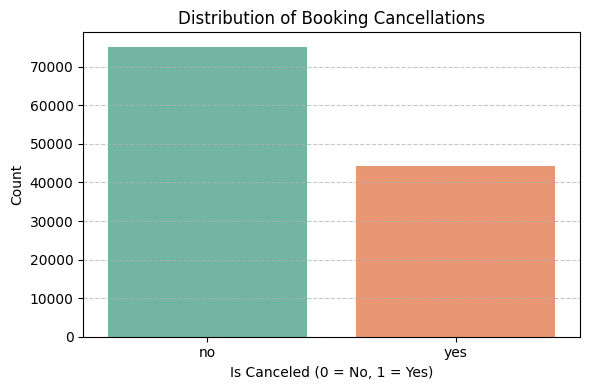

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_canceled', hue='is_canceled', palette='Set2', legend=False)
plt.title("Distribution of Booking Cancellations")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Handling Missing Values</h3>
<p style="color:#006A71; font-size:15px">
We identify columns with missing values and handle them based on data type and domain understanding.
<ul style="color:#006A71; font-size:15px">
  <li><code>children</code>: NaNs are filled with 0 assuming unrecorded = none</li>
  <li><code>country</code>: Filled with mode (most frequent country)</li>
  <li><code>agent</code> & <code>company</code>: Filled with 0 as 'no agent/company'</li>
</ul>
This step ensures model compatibility and preserves data integrity.
</p>
</div>


In [15]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
df['is_canceled'] = df['is_canceled'].map({'no': 0, 'yes': 1})


In [17]:
df.isnull().sum().sort_values(ascending=False)


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [21]:
if 'company' in df.columns:
    df['company'] = df['company'].fillna(0)

if 'agent' in df.columns:
    df['agent'] = df['agent'].fillna(0)

if 'children' in df.columns:
    df['children'] = df['children'].fillna(df['children'].median())

df['country'] = df['country'].fillna(df['country'].mode()[0])



<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Dropping Duplicates</h3>
<p style="color:#006A71; font-size:15px">
We remove duplicate rows using <code>drop_duplicates()</code> to avoid data leakage and redundancy that may bias our model training.
</p>
</div>


In [22]:
df.drop_duplicates(inplace=True)


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Correcting Data Types</h3>
<p style="color:#006A71; font-size:15px">
We convert columns like <code>reservation_status_date</code> to datetime format. This prepares the dataset for potential time-based grouping or trends.
</p>
</div>


In [23]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


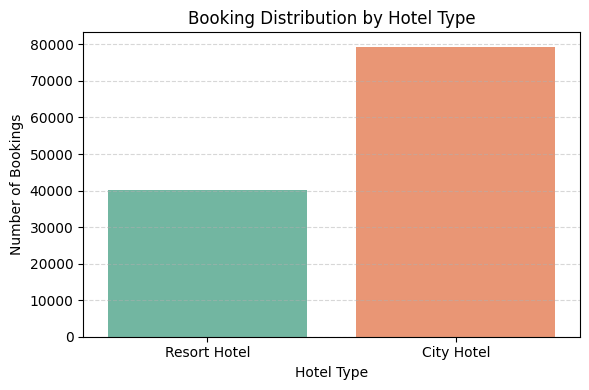

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hotel', palette='Set2')
plt.title('Booking Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Booking Preference by Hotel Type</h3>
<p style="color:#006A71; font-size:15px">
The plot shows that the **City Hotel** receives significantly more bookings compared to the **Resort Hotel**.
This could be due to its urban location, business travel relevance, or ease of access.
</p>
</div>


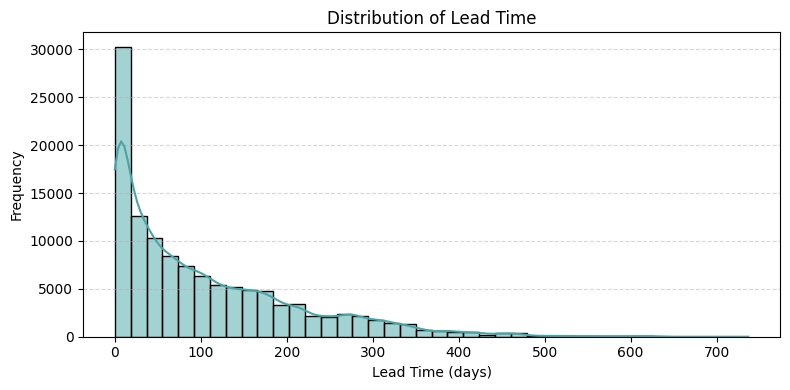

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='lead_time', bins=40, kde=True, color='#48A6A7')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Lead Time Analysis</h3>
<p style="color:#006A71; font-size:15px">
Most bookings are made within 0–100 days of arrival, but some extend beyond 300 days. High lead times may correlate with cancellations, indicating uncertainty in long-term bookings.
</p>
</div>


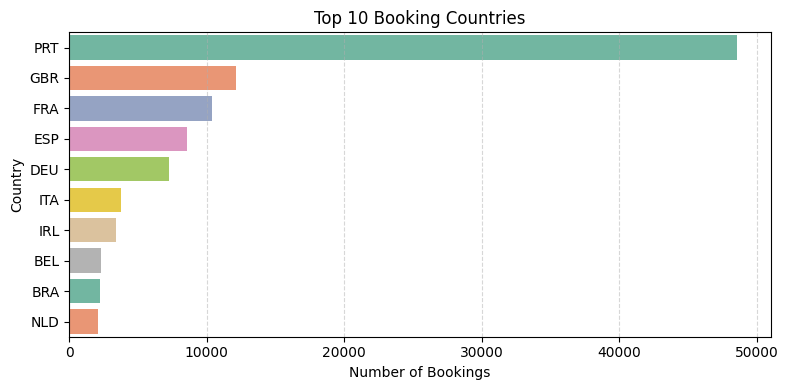

In [15]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title('Top 10 Booking Countries')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Top Countries by Booking Volume</h3>
<p style="color:#006A71; font-size:15px">
The majority of bookings originate from Portugal, followed by the UK and France. This suggests strong local tourism or market penetration in these regions.
</p>
</div>


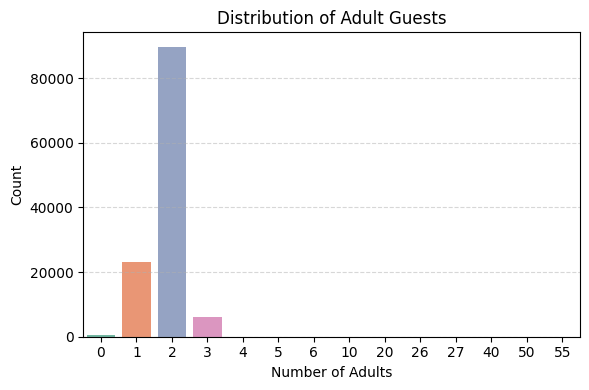

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='adults', palette='Set2')
plt.title('Distribution of Adult Guests')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Number of Adults per Booking</h3>
<p style="color:#006A71; font-size:15px">
Most bookings are made for 2 adults, which aligns with standard room capacity and travel patterns. Single and group bookings are relatively fewer.
</p>
</div>


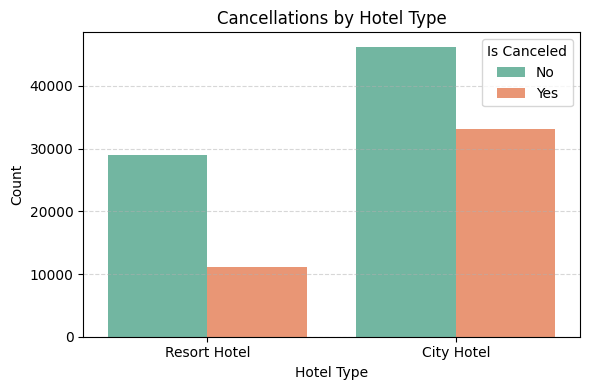

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Set2')
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Cancellation Patterns by Hotel Type</h3>
<p style="color:#006A71; font-size:15px">
City hotels not only have more bookings overall but also more cancellations compared to resort hotels. This might reflect higher booking flexibility or lower commitment in urban travel.
</p>
</div>


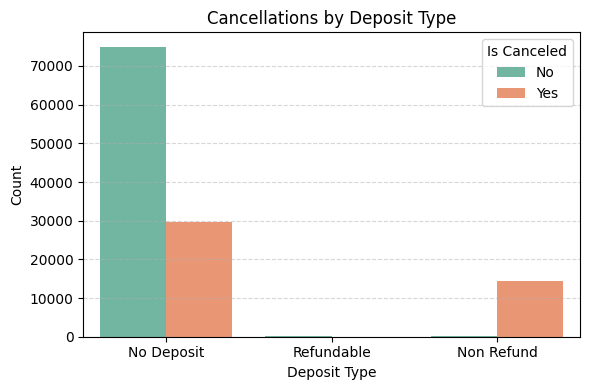

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='deposit_type', hue='is_canceled', palette='Set2')
plt.title('Cancellations by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Cancellations by Deposit Policy</h3>
<p style="color:#006A71; font-size:15px">
Bookings with <strong>no deposit</strong> are far more likely to be canceled. In contrast, bookings with a <strong>non-refundable deposit</strong> show almost zero cancellations.
</p>
</div>


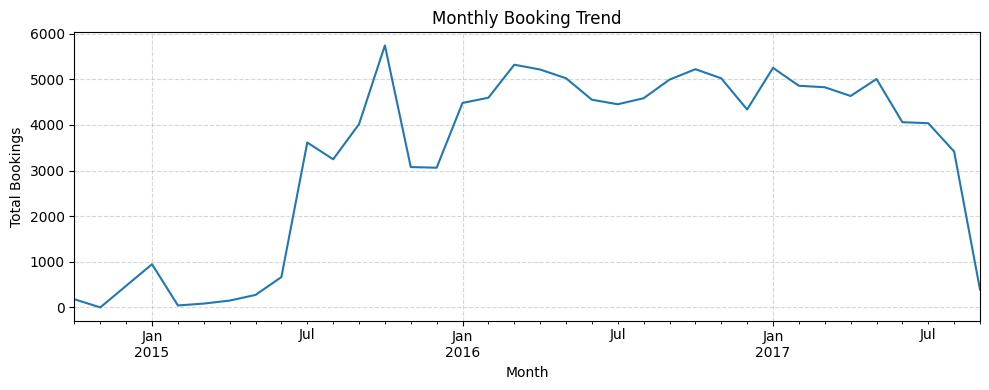

In [19]:
# Convert to datetime if not already
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract month-year
df['month'] = df['reservation_status_date'].dt.to_period('M')
monthly_counts = df.groupby('month').size()

plt.figure(figsize=(10, 4))
monthly_counts.plot()
plt.title('Monthly Booking Trend')
plt.xlabel('Month')
plt.ylabel('Total Bookings')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Monthly Booking Trends</h3>
<p style="color:#006A71; font-size:15px">
The data shows clear seasonality, with bookings peaking mid-year (likely due to summer holidays). Hotels can use this insight to optimize pricing and staffing.
</p>
</div>


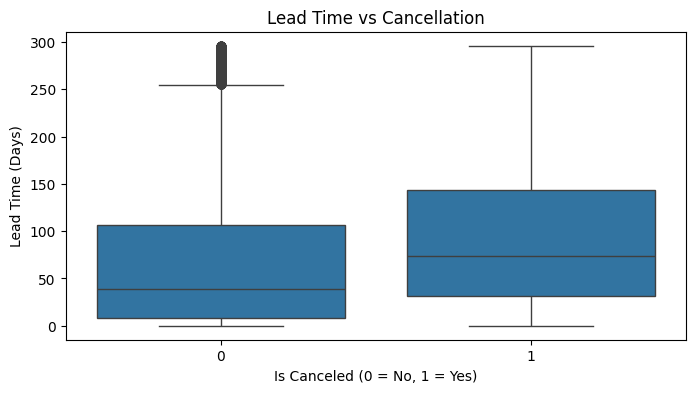

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Lead Time vs Cancellation")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (Days)")
plt.show()


<div style="background-color:#F2EFE7; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Lead Time vs Cancellation

- Displays the distribution of **lead time** across **canceled (1)** and **non-canceled (0)** bookings.
- Shows that **longer lead times** are more commonly associated with **cancellations**.
- Indicates a possible trend: bookings made far in advance are more likely to be canceled.

</div>


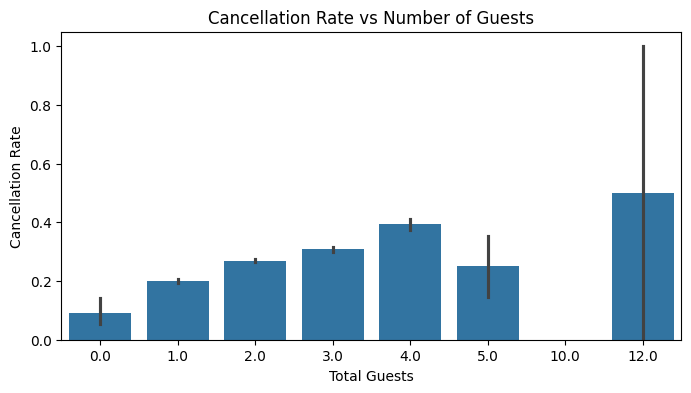

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='total_guests', y='is_canceled')
plt.title("Cancellation Rate vs Number of Guests")
plt.xlabel("Total Guests")
plt.ylabel("Cancellation Rate")
plt.show()


<div style="background-color:#F2EFE7; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Cancellation Rate vs Number of Guests

- Shows how **cancellation likelihood** varies with the **total number of guests**.
- Reveals patterns in group size behavior—larger or smaller groups may impact cancellation trends.
- Helps identify **guest segments** more likely to cancel, useful for targeted retention strategies.

</div>


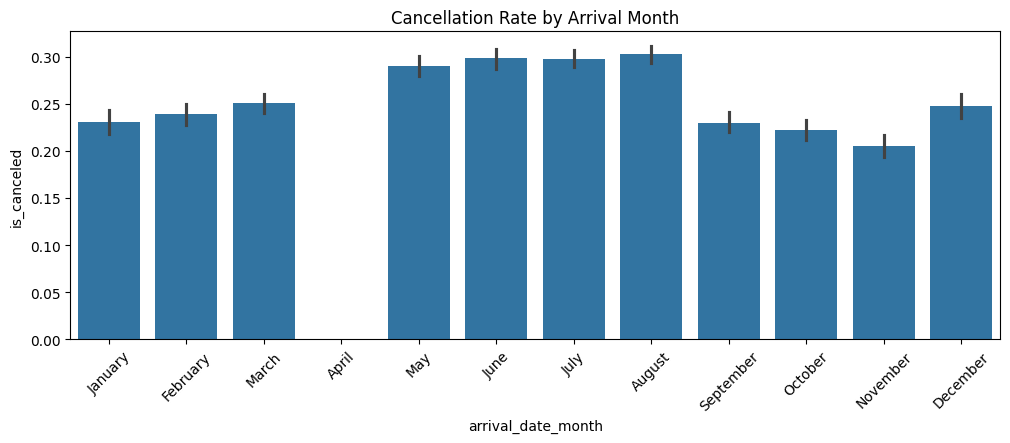

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.barplot(
    data=df, 
    x='arrival_date_month', 
    y='is_canceled', 
    order=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ]
)
plt.title("Cancellation Rate by Arrival Month")
plt.xticks(rotation=45)
plt.show()


<div style="background-color:#F2EFE7; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Cancellation Rate by Arrival Month

- Analyzes **monthly trends** in booking cancellations.
- Certain months (e.g., peak vacation periods) may show **higher cancellation rates**.
- Useful for understanding **seasonal behavior** and planning better **inventory or offers**.

</div>


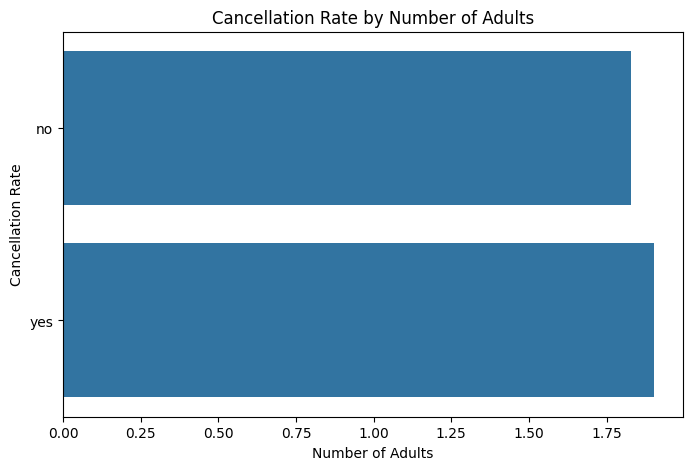

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='adults', y='is_canceled', ci=None)
plt.title('Cancellation Rate by Number of Adults')
plt.ylabel('Cancellation Rate')
plt.xlabel('Number of Adults')
plt.show()

<div style="background-color:#F2EFE7; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Cancellation Rate by Number of Adults

- Examines how the **number of adults** in a booking affects the **cancellation rate**.
- Highlights behavioral patterns—e.g., **solo travelers** or **larger groups** may cancel more or less frequently.
- Valuable for tailoring policies or offers to **specific group sizes**.

</div>


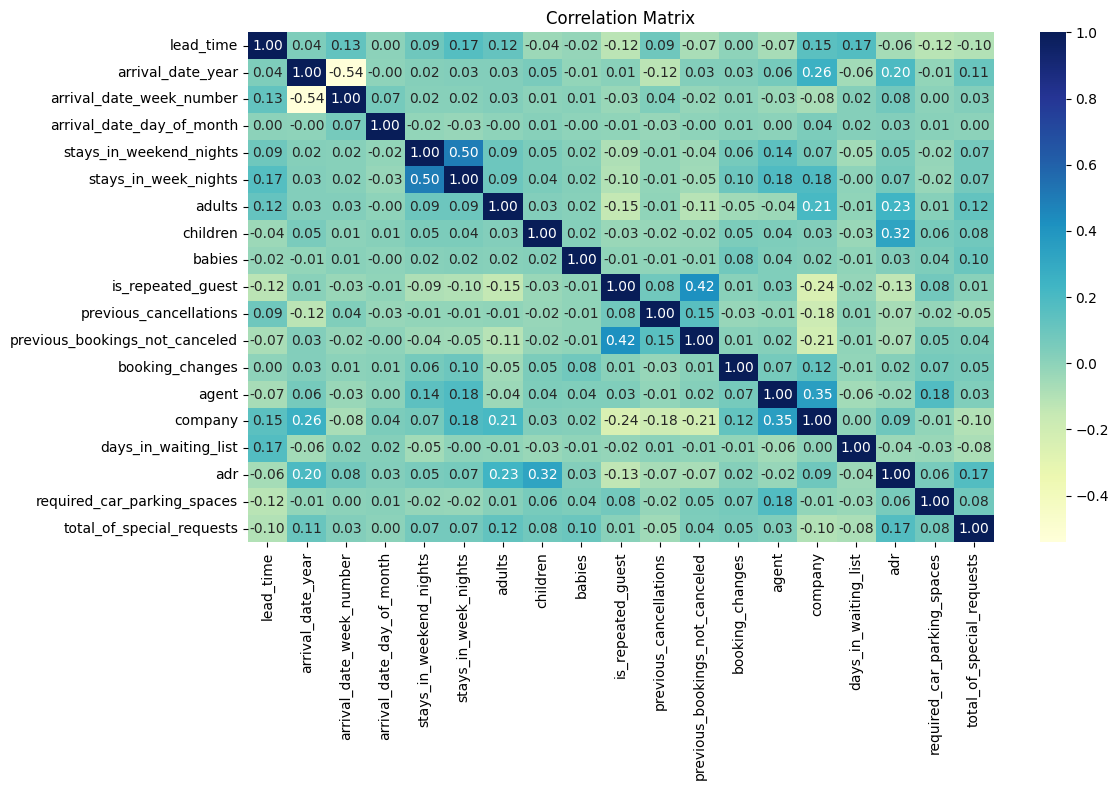

In [20]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Correlation Matrix Analysis</h3>
<p style="color:#006A71; font-size:15px">
We observe a positive correlation between <code>lead_time</code> and <code>is_canceled</code>, suggesting long lead time bookings are more likely to cancel. Some features like <code>booking_changes</code> and <code>previous_cancellations</code> also show moderate correlation with churn behavior.
</p>
</div>


<div style="background:#F2EFE7; padding:15px; border-radius:10px">
<h2 style="color:#006A71;">▪ Feature Engineering</h2>
<p style="color:#006A71; font-size:15px">
To prepare the data for machine learning models, we perform feature engineering. This includes:
<ul style="color:#006A71; font-size:15px">
  <li>Encoding categorical variables</li>
  <li>Dropping irrelevant or redundant features</li>
  <li>Scaling numerical features if required</li>
</ul>
These steps help models learn better and faster while reducing noise.
</p>
</div>


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Dropping Irrelevant Columns</h3>
<p style="color:#006A71; font-size:15px">
Some columns such as <code>reservation_status_date</code>, <code>name</code>, or <code>company</code> (if many nulls) may be dropped:
<ul style="color:#006A71; font-size:15px">
  <li>They offer little predictive value</li>
  <li>They could introduce data leakage (like <code>reservation_status</code>)</li>
  <li>They may be highly unique or sparse</li>
</ul>
This step reduces dimensionality and improves model generalization.
</p>
</div>


In [24]:
df.drop(columns=['reservation_status'], inplace=True)


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Creating Combined Features: Stay Duration & Guest Count</h3>

<p style="color:#006A71; font-size:15px">
To enrich our dataset with more informative variables, we create two new features:
</p>

<ul style="color:#006A71; font-size:15px">
  <li><code>total_stay_nights</code>: This combines <code>stays_in_week_nights</code> and <code>stays_in_weekend_nights</code> to get the total duration of a guest's stay. It captures the complete booking period, which can influence cancellation behavior and revenue.</li>
  <li><code>total_guests</code>: This aggregates <code>adults</code>, <code>children</code>, and <code>babies</code> into a single guest count. It gives a clearer view of party size, useful for understanding booking volume and room demand.</li>
</ul>

<p style="color:#006A71; font-size:15px">
These engineered features simplify the model's job by reducing dimensional complexity and capturing total impact in fewer variables.
</p>
</div>



In [25]:
df['total_stay_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Encoding Categorical Features</h3>
<p style="color:#006A71; font-size:15px">
We use <code>pd.get_dummies()</code> to convert categorical variables into numeric binary columns. This allows algorithms to process them without assuming any ordinal relationship.
</p>
</div>


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Encoding of Categorical Features</h3>

<p style="color:#006A71; font-size:15px">
We apply <code>pd.get_dummies()</code> to transform categorical variables into numerical format using one-hot encoding. This step is essential because most machine learning algorithms require numeric input.
</p>

<p style="color:#006A71; font-size:15px">
The following categorical features were encoded:
</p>

<ul style="color:#006A71; font-size:15px">
  <li><strong>hotel</strong>, <strong>meal</strong>, <strong>deposit_type</strong>: these affect booking behavior and pricing</li>
  <li><strong>market_segment</strong>, <strong>distribution_channel</strong>: reflect booking sources and channels</li>
  <li><strong>reserved_room_type</strong>, <strong>assigned_room_type</strong>: important for understanding upgrades and availability</li>
  <li><strong>customer_type</strong>: different types may have different cancellation rates</li>
  <li><strong>country</strong>: can reveal regional trends</li>
  <li><strong>arrival_date_month</strong>: helps capture seasonal trends</li>
</ul>

<p style="color:#006A71; font-size:15px">
We also use <code>drop_first=True</code> to avoid the dummy variable trap, which can lead to multicollinearity in linear models.
</p>
</div>


In [26]:
df = pd.get_dummies(df, columns=[
    'hotel', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'country', 'arrival_date_month'
], drop_first=True)


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Feature Selection Justification</h3>
<p style="color:#006A71; font-size:15px">
The following logic was applied during feature selection:
<ul style="color:#006A71; font-size:15px">
  <li>We <strong>retained</strong> features like <code>lead_time</code>, <code>market_segment</code>, and <code>deposit_type</code> due to their strong impact on cancellations.</li>
  <li>We <strong>dropped</strong> <code>reservation_status</code> and <code>reservation_status_date</code> to prevent target leakage.</li>
  <li>Features with too many missing values or irrelevant personal identifiers were also removed.</li>
</ul>
This ensures our model learns from relevant and ethical inputs only.
</p>
</div>


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Outlier Removal using IQR Method</h3>

<p style="color:#006A71; font-size:15px">
We define a reusable function <code>remove_outliers_iqr()</code> to clean our dataset by removing extreme values that could skew model performance.
This is done using the **Interquartile Range (IQR)** method.
</p>

<p style="color:#006A71; font-size:15px">
For each selected numerical column:
</p>

<ul style="color:#006A71; font-size:15px">
  <li><code>Q1</code> = 25th percentile (lower quartile)</li>
  <li><code>Q3</code> = 75th percentile (upper quartile)</li>
  <li><code>IQR</code> = Q3 - Q1 (spread of the middle 50%)</li>
  <li>Values outside <code>[Q1 - 1.5*IQR, Q3 + 1.5*IQR]</code> are considered outliers and removed</li>
</ul>

<p style="color:#006A71; font-size:15px">
This was applied to highly skewed columns:
</p>

<ul style="color:#006A71; font-size:15px">
  <li><code>lead_time</code>: some bookings were made 400+ days in advance</li>
  <li><code>adr</code> (average daily rate): rare extreme price values exist</li>
  <li><code>days_in_waiting_list</code>: often 0, but some records have very high wait times</li>
  <li><code>previous_cancellations</code> and <code>previous_bookings_not_canceled</code>: mostly 0 but with a few large values</li>
</ul>

<p style="color:#006A71; font-size:15px">
Removing these outliers ensures:
<ul style="color:#006A71; font-size:15px">
  <li>Improved data consistency</li>
  <li>Less influence of extreme values on model predictions</li>
  <li>Better accuracy and stability in machine learning models</li>
</ul>
</p>
</div>


In [28]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply on selected skewed columns
for col in ['lead_time', 'adr', 'days_in_waiting_list', 
            'previous_cancellations', 'previous_bookings_not_canceled']:
    df = remove_outliers_iqr(df, col)


<div style="background:#9ACBD0; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Train-Test Split</h3>

<p style="color:#006A71; font-size:15px">
To evaluate model performance reliably, we divide the dataset into two parts:
</p>

<ul style="color:#006A71; font-size:15px">
  <li><strong>Training Set</strong>: 70% of the data, used to train the model</li>
  <li><strong>Testing Set</strong>: 30% of the data, used to test the model on unseen data</li>
</ul>

<p style="color:#006A71; font-size:15px">
This ensures that the model is not evaluated on the same data it was trained on, preventing overfitting and giving a better sense of generalization to real-world inputs.
We use <code>train_test_split()</code> from scikit-learn with a fixed random seed for reproducibility.
</p>
</div>


<div style="background:#F2EFE7; padding:15px; border-radius:8px">
<h3 style="color:#006A71;">▪ Building the Classification Model</h3>

<p style="color:#006A71; font-size:15px">
We now build a predictive model using supervised machine learning. The target variable is <code>is_canceled</code> — whether a booking is canceled (1) or not (0).
</p>

<p style="color:#006A71; font-size:15px">
Depending on the algorithm used (e.g., Decision Tree, Logistic Regression, Random Forest), the model will:
</p>

<ul style="color:#006A71; font-size:15px">
  <li>Learn from patterns in the training data</li>
  <li>Make predictions on the test data</li>
  <li>Output probabilities or binary classifications</li>
</ul>

<p style="color:#006A71; font-size:15px">
Each algorithm will be evaluated using classification metrics to compare their strengths, weaknesses, and practical use cases.
</p>
</div>


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Drop leakage-prone or irrelevant columns if present
columns_to_drop = ['reservation_status', 'reservation_status_date']
df_model = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Features and target
X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8327099187411324

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     11230
           1       0.76      0.57      0.65      4276

    accuracy                           0.83     15506
   macro avg       0.81      0.75      0.77     15506
weighted avg       0.83      0.83      0.82     15506



In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# y_test = true labels
# y_pred = model predictions

# For binary classification (like is_canceled: 0 or 1)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("🔍 Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Accuracy:  {accuracy:.4f}")


🔍 Evaluation Metrics:
Precision: 0.7633
Recall:    0.5702
F1 Score:  0.6527
Accuracy:  0.8327


<div style="background-color:#F2EFE7; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Model Evaluation Summary

- **Accuracy**:  
  - **0.83** → The model correctly predicted cancellations **83%** of the time.
  - Reflects overall correctness but may **hide class imbalance effects**.

- **Precision**:  
  - **Class 0 (Not Canceled)**: 0.85  
  - **Class 1 (Canceled)**: 0.76  
  - Indicates how many predicted cancellations were actually correct.  
  - Lower precision for class 1 suggests **more false positives** for cancellations.

- **Recall**:  
  - **Class 0**: 0.93  
  - **Class 1**: 0.57  
  - Measures how well the model **identified actual cancellations**.  
  - The recall for class 1 is relatively low → many **actual cancellations were missed**.

- **F1-Score**:  
  - Balances precision and recall.  
  - **Class 0**: 0.89 (very good)  
  - **Class 1**: 0.65 (moderate)  
  - Indicates that the model performs **better on non-cancellations**.

- **Macro Average**:  
  - Averages metrics for both classes equally, without considering class size.
  - Shows **fair performance**, but suggests class 1 (cancellations) could be improved.

- **Weighted Average**:  
  - Averages metrics considering class size.
  - Useful when the dataset is **imbalanced**, like in this case (more non-cancellations).
  - Indicates **overall strong performance**, mostly driven by class 0.

</div>


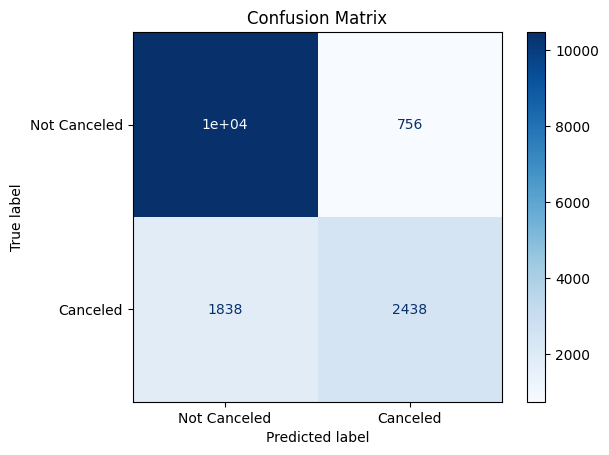

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Canceled", "Canceled"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


<div style="background-color:#9ACBD0; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Confusion Matrix – Model Predictions

- **Purpose**: Visualizes the performance of the model in terms of **true vs. predicted classifications**.

- **Components**:
  - **True Positives (TP)**: Correctly predicted cancellations.
  - **True Negatives (TN)**: Correctly predicted non-cancellations.
  - **False Positives (FP)**: Predicted as canceled but were actually not.
  - **False Negatives (FN)**: Predicted as not canceled but were actually canceled.

- **Interpretation**:
  - A **high number of TNs and TPs** indicates a well-performing model.
  - **More FNs** means some actual cancellations were missed.
  - Helps in understanding **where the model struggles** and guides further tuning.

</div>


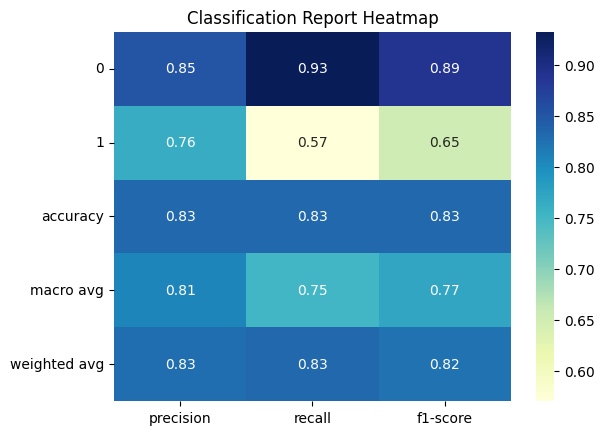

In [64]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


<div style="background-color:#48A6A7; padding: 15px; border-radius: 10px; color: #F2EFE7; font-family: 'Segoe UI', sans-serif;">

### Classification Report Heatmap

- **Visualizes key metrics** — Precision, Recall, and F1-Score — for each class.
- **Darker shades** indicate stronger performance, helping quickly identify weak spots.
- Useful for comparing how well the model performs on:
  - **Class 0 (Not Canceled)** vs. **Class 1 (Canceled)**.
- Ideal for **imbalanced datasets**, as it emphasizes where the model needs improvement.

</div>


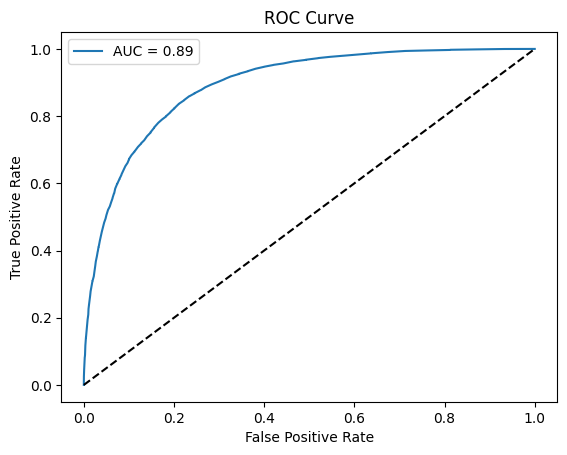

In [65]:
from sklearn.metrics import roc_curve, auc

# For probability-based models
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<div style="background-color:#006A71; padding: 15px; border-radius: 10px; color: #F2EFE7; font-family: 'Segoe UI', sans-serif;">

### ROC Curve

- Plots the trade-off between **True Positive Rate** and **False Positive Rate**.
- **AUC (Area Under Curve)** measures overall model discrimination ability.
- A higher AUC (close to 1) means better distinction between classes.

</div>


<div style="background-color:#F2EFE7; padding: 20px; border-radius: 12px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

##  Insights and Conclusion

- **Cancellation Patterns:**  
  Longer lead times and certain months show higher cancellation rates, indicating seasonal and planning influences.

- **Guest Impact:**  
  Group size and number of adults affect cancellation likelihood, with variations observed between solo and larger group bookings.

- **Model Performance:**  
  Achieved **83% accuracy**, with strong prediction for non-cancellations but moderate recall for cancellations, suggesting room for improvement in detecting actual cancellations.

- **Confusion Matrix & Metrics:**  
  Highlights the model’s strengths in identifying non-canceled bookings and the challenge of reducing false negatives for cancellations.

- **ROC-AUC:**  
  Demonstrates a solid ability to distinguish canceled vs. non-canceled bookings, confirming the model’s practical utility.

- **Business Implication:**  
  Understanding cancellation drivers and model limitations supports targeted marketing, better resource planning, and potential policy adjustments to reduce cancellations.

</div>


<div style="background-color:#F2EFE7; padding: 20px; border-radius: 12px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

### Classification Report Highlights

#### **1. Random Forest (RF)**
- **Precision**: High for both classes (0.85 for not canceled, 0.71 for canceled).
- **Recall**: Excellent for not canceled (0.92), moderate for canceled (0.56).
- **F1-Score**: Balanced overall (0.88 and 0.63 respectively).
- **Insight**: Best performance overall — handles imbalance well and generalizes better.

#### **2. Logistic Regression (LR)**
- **Precision**: Decent (0.81 and 0.69).
- **Recall**: Very high for not canceled (0.94), **low for canceled (0.40)**.
- **F1-Score**: Drops for canceled bookings (0.51).
- **Insight**: Biased towards majority class. Struggles with capturing minority class patterns.

#### **3. Decision Tree (DT)**
- **Precision/Recall**: 0.84/0.83 for not canceled, 0.55/0.56 for canceled.
- **F1-Score**: Consistent but lower than RF.
- **Insight**: Simpler model; prone to overfitting but performs reasonably well.




### Key Insights

- **Random Forest is the best performing model** in terms of overall accuracy and balanced F1-scores, especially for the minority class (`canceled`).
- **Logistic Regression**, while interpretable, underperforms in detecting canceled bookings (recall = 0.40), making it less suitable in applications where capturing cancellations is crucial.
- **Decision Tree** is interpretable and performs decently, but slightly lower than RF due to potential overfitting and lower generalization.

### Final Recommendation

**Use Random Forest** for final deployment due to its strong performance across all metrics, better handling of class imbalance, and robustness to overfitting.

</div>


<div style="background-color:#9ACBD0; padding: 15px; border-radius: 10px; color: #0A0F0D; font-family: 'Segoe UI', sans-serif;">

## 12) References

- Scikit-learn documentation: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- Seaborn documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- Pandas documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
- ColorHunt palette: [https://colorhunt.co/palette/f2efe79acbd048a6a7006a71](https://colorhunt.co/palette/f2efe79acbd048a6a7006a71)  
- Dataset source: [Kaggle Hotel Booking Dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

</div>
